In [ ]:
from MieSppForce.simulation import SimulationConfig, SweepRunner, Visualizer, DipoleCalculator, OpticalForceCalculator
import numpy as np
from pint import UnitRegistry
ureg = UnitRegistry()

base_config = SimulationConfig(
    wl =600 * ureg.nanometer,
    R =  295/2* ureg.nanometer,
    dist = 2 * ureg.nanometer,
    angle = np.deg2rad(25),
    a_angle = np.pi / 4,
    phase= - np.pi/2
)

In [19]:
from MieSppForce.simulation import CylindricalGrid, FieldsCalculator

grid = CylindricalGrid(
    r=np.linspace(1, 1001, 100, dtype=int) * ureg.nm,  # 1D по r
    phi=np.linspace(0, 2*np.pi, 100) * ureg.radian,
    z=np.array([0.0]) * ureg.nm
)

fc = FieldsCalculator(base_config)
result = fc.compute(grid)
print(result)
# result.to_csv("field_result.csv")

100%|██████████| 10000/10000 [00:03<00:00, 2630.00it/s]


FieldResult: 10000 points
Columns: ['r', 'phi', 'z', 'Ex', 'Ey', 'Ez', 'Hx', 'Hy', 'Hz', 'Hphi_abs2']


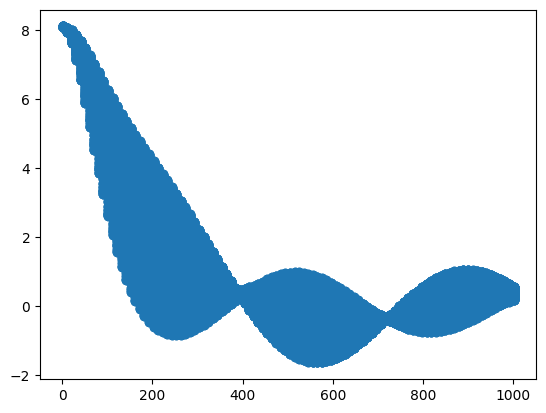

In [20]:
from matplotlib import pyplot as plt
plt.scatter(result.df['r'].apply(lambda x: x.to('nm').magnitude),result.df['Ex'].apply(lambda x: x.to('V/m').magnitude.real))

In [2]:
dip_res = DipoleCalculator(base_config).compute()
dip_res.as_dict()

{'px': <Quantity((-2.152098701036431e-32-1.2099159403058734e-31j), 'coulomb * meter')>,
 'py': <Quantity((1.3079716596409156e-31-3.14899660828245e-32j), 'coulomb * meter')>,
 'pz': <Quantity((-8.204521095667606e-33+2.7781939405534193e-33j), 'coulomb * meter')>,
 'mx': <Quantity((-5.4034039918056984e-24-1.2321310822217334e-23j), 'ampere * meter ** 2')>,
 'my': <Quantity((1.3692217079327095e-23-5.572775704182335e-24j), 'ampere * meter ** 2')>,
 'mz': <Quantity((1.274056053860676e-23-6.727101617787664e-24j), 'ampere * meter ** 2')>}

In [8]:
force_res = OpticalForceCalculator(base_config).compute()
force_res.as_dict()

{'Fx': <Quantity(5.43500964e-25, 'newton')>,
 'Fxe0': <Quantity(6.4679017e-25, 'newton')>,
 'Fxe1': <Quantity(1.86882998e-26, 'newton')>,
 'Fxe2': <Quantity(1.80331152e-26, 'newton')>,
 'Fxm0': <Quantity(7.42114786e-26, 'newton')>,
 'Fxm1': <Quantity(1.75385411e-26, 'newton')>,
 'Fxm2': <Quantity(9.32059663e-27, 'newton')>,
 'Fxcross': <Quantity(-2.41081238e-25, 'newton')>,
 'Fy': <Quantity(5.03523168e-26, 'newton')>,
 'Fye0': <Quantity(0.0, 'newton')>,
 'Fye1': <Quantity(-1.86480005e-27, 'newton')>,
 'Fye2': <Quantity(1.30845621e-26, 'newton')>,
 'Fym0': <Quantity(0.0, 'newton')>,
 'Fym1': <Quantity(-1.91494118e-27, 'newton')>,
 'Fym2': <Quantity(-2.26009939e-26, 'newton')>,
 'Fycross': <Quantity(6.36484898e-26, 'newton')>,
 'Fz': <Quantity(-1.51748756e-25, 'newton')>,
 'Fze0': <Quantity(-1.44954879e-25, 'newton')>,
 'Fze1': <Quantity(-4.96049742e-25, 'newton')>,
 'Fze2': <Quantity(1.08996544e-25, 'newton')>,
 'Fzm0': <Quantity(3.65524432e-25, 'newton')>,
 'Fzm1': <Quantity(6.77923651

In [24]:
sweep_res = SweepRunner(base_config, 'wl', np.linspace(600,1200,100) * ureg.nm, True, True, False).run()

Sweeping 'wl':  32%|███▏      | 32/100 [00:13<00:40,  1.69step/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:449: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,
Sweeping 'wl':  37%|███▋      | 37/100 [00:18<00:55,  1.13step/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
Swe

In [25]:
sweep_res

(                              wl  \
 0                600.0 nanometer   
 1     606.060606060606 nanometer   
 2    612.1212121212121 nanometer   
 3    618.1818181818181 nanometer   
 4    624.2424242424242 nanometer   
 ..                           ...   
 95  1175.7575757575758 nanometer   
 96  1181.8181818181818 nanometer   
 97   1187.878787878788 nanometer   
 98   1193.939393939394 nanometer   
 99              1200.0 nanometer   
 
                                                    px  \
 0   (-2.152098701036431e-32-1.2099159403058734e-31...   
 1   (-2.621654042616374e-32-1.165621682611849e-31j...   
 2   (-2.8574603417810065e-32-1.1453139048323648e-3...   
 3   (-3.050797615386759e-32-1.1417577688107663e-31...   
 4   (-3.264364217206048e-32-1.1461032920820622e-31...   
 ..                                                ...   
 95  (-3.548237813291469e-31-3.6469467243887366e-31...   
 96  (-3.640707723960652e-31-3.559592946012016e-31j...   
 97  (-3.7229196410204486e-31-3.

In [43]:
sweep_res[0]['wl'].apply( lambda x: x.magnitude)

0      600.000000
1      606.060606
2      612.121212
3      618.181818
4      624.242424
         ...     
95    1175.757576
96    1181.818182
97    1187.878788
98    1193.939394
99    1200.000000
Name: wl, Length: 100, dtype: float64

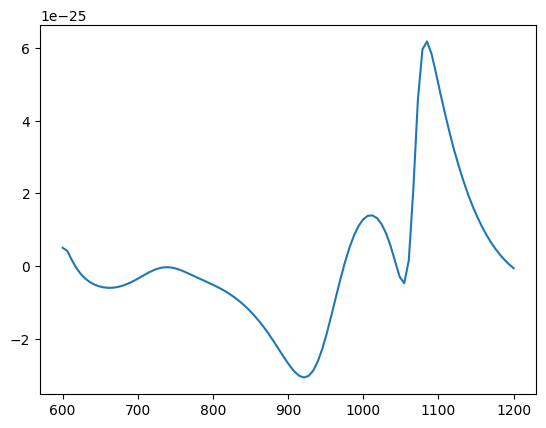

In [47]:
from matplotlib import pyplot as plt

plt.plot(sweep_res[0]['wl'].apply( lambda x: x.magnitude), sweep_res[0]['Fy'].apply( lambda x: x.magnitude))
plt.show()

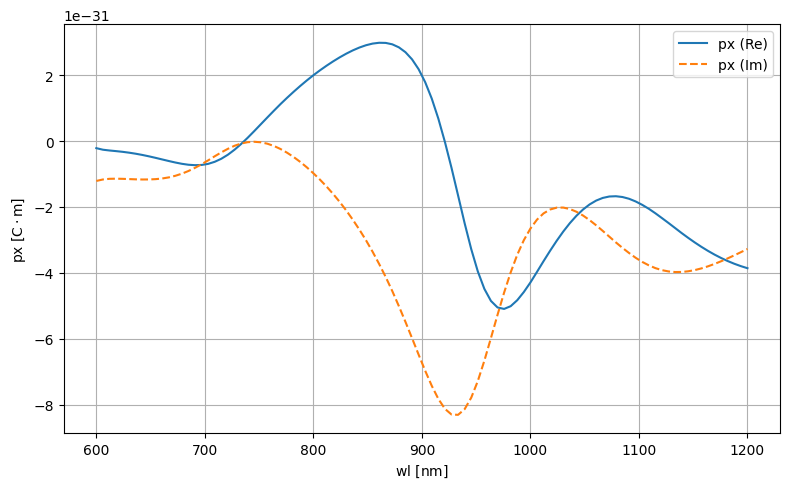

In [49]:
Visualizer.plot_component(sweep_res[0], 'wl', 'px')

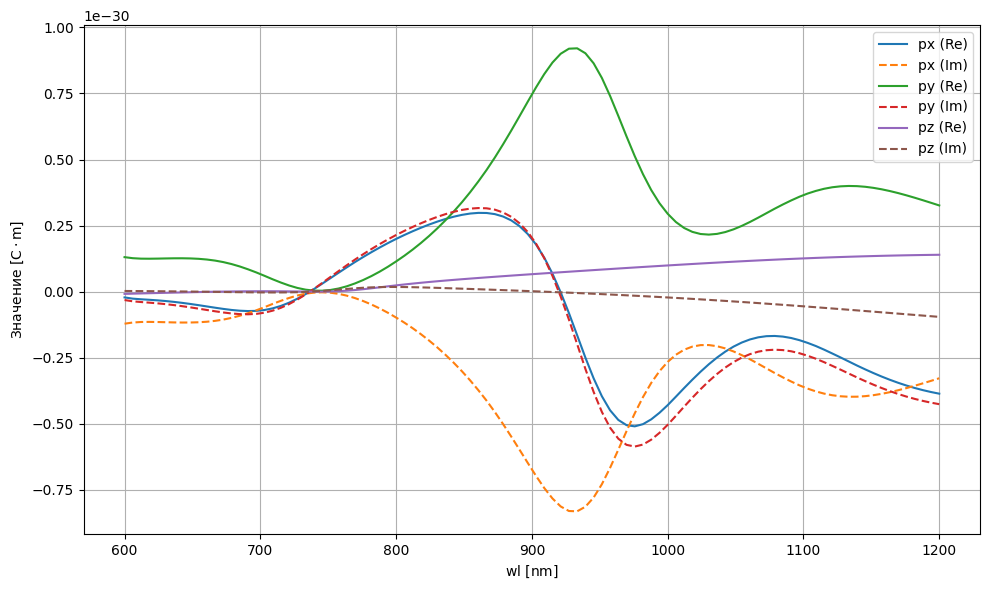

In [50]:
Visualizer.plot_components(sweep_res[0], 'wl', 'px py pz')

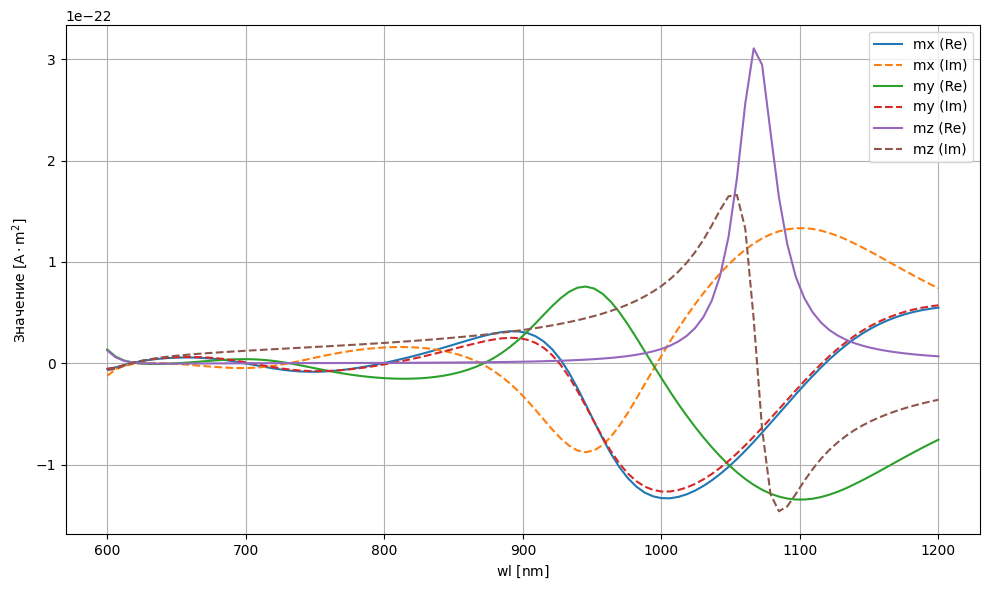

In [51]:
Visualizer.plot_components(sweep_res[0], 'wl', 'mx my mz')

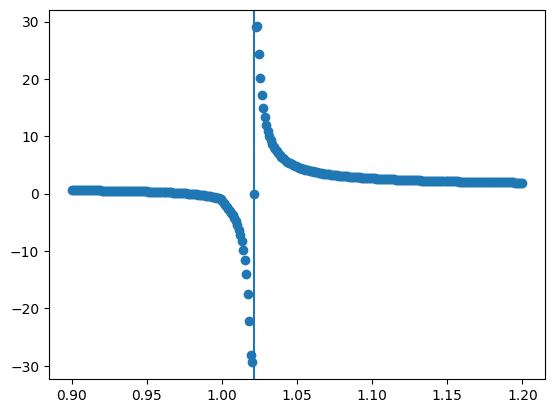

In [ ]:
from MieSppForce import frenel
from matplotlib import pyplot as plt
kr= np.linspace(0.9,1.2,300)
eps_Au = frenel.get_interpolate('Au')
wl=800
plt.scatter(kr, frenel.reflection_coeff(wl, eps_Au, kr)[0].real)
plt.axvline(np.sqrt(eps_Au(wl)/(1+eps_Au(wl))).real)

In [5]:
Fsppx = F_x - F_x01
Fsppy = F_y - F_y01
Fsppz = F_z - F_z01

In [25]:
PHI = np.linspace(0, 2*np.pi, 100)

directivity = np.empty((len(PHI), len(wls)))
for wl_idx, wl in enumerate(wls):
    for angle_idx in range(len(PHI)):
        D = get_directivity(wl, P[wl_idx,:], M[wl_idx,:], eps_Au)
        directivity[angle_idx, wl_idx] = D(PHI[angle_idx])

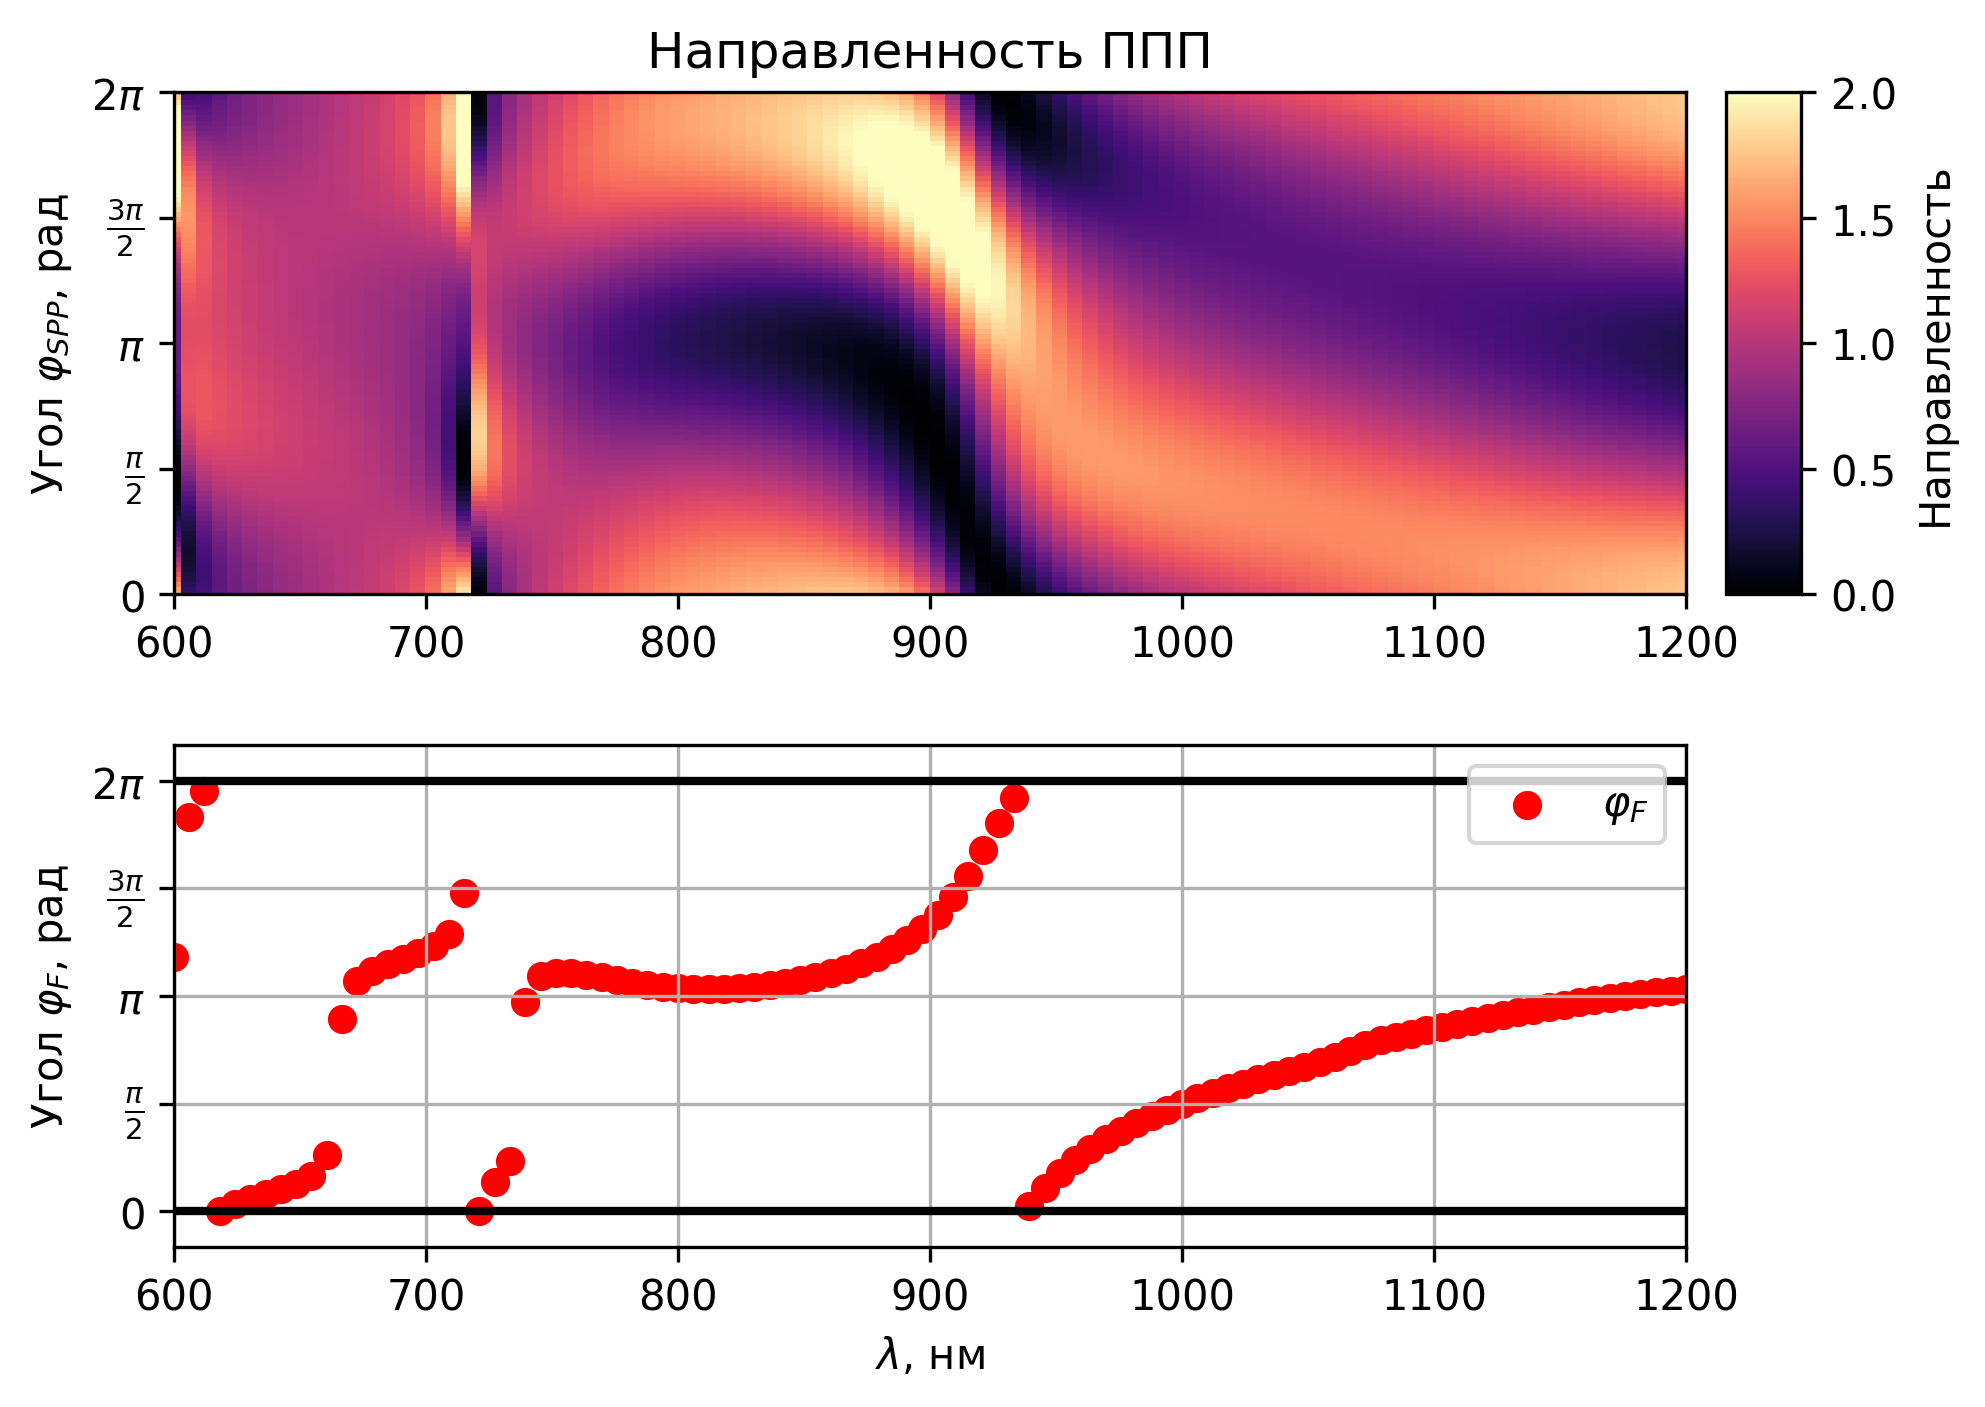

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np


# === Создание фигуры и макета ===
fig = plt.figure(figsize=(7, 5), dpi=300)
gs = gridspec.GridSpec(2, 2, width_ratios=[20, 1], height_ratios=[1, 1], hspace=0.3, wspace=0.05)

# === Верхний график (тепловая карта) ===
ax_top = fig.add_subplot(gs[0, 0])
directivity_map = ax_top.pcolor(wls, PHI, directivity, cmap='magma', vmax=2, vmin=0)

# Настройка оси Y: метки углов в виде кратных π
y_ticks = [0, np.pi/2, np.pi, np.pi*3/2, 2*np.pi]
y_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']
# y_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
# y_ticklabels = [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$']
ax_top.set_yticks(y_ticks)
ax_top.set_yticklabels(y_ticklabels)

ax_top.set_ylim(0, 2*np.pi)
ax_top.set_ylabel(r'Угол $\varphi_{SPP}$, рад')
ax_top.set_title('Направленность ППП')

# === Colorbar ===
cax = fig.add_subplot(gs[0, 1])
fig.colorbar(directivity_map, cax=cax, label='Направленность')

# === Нижний график (углы силы) ===
ax_bottom = fig.add_subplot(gs[1, 0], sharex=ax_top)

angles_no_sc= np.arctan2(Fsppy[:,0], Fsppx[:,0])

angles_no_sc = (angles_no_sc + 2 * np.pi) % (2 * np.pi)
#angles_no_sc= np.unwrap(angles_no_sc)

# Границы и метки оси Y

ax_bottom.set_yticks(y_ticks)
ax_bottom.set_yticklabels(y_ticklabels)
ax_bottom.axhline(0, color='black', linestyle='-', linewidth=2)
ax_bottom.axhline(2*np.pi, color='black', linestyle='-', linewidth=2)
# closest_to_zero_idx = np.argmin(np.abs(angles_no_sc_from_R))
# approx_zero_crossing_x = Rs[closest_to_zero_idx]
# ax_bottom.axvline(approx_zero_crossing_x, color='black', linestyle='--', linewidth=2)
ax_bottom.scatter(wls, angles_no_sc, label=r'$\varphi_F$', color='r', linewidth=1)
ax_bottom.set_ylim(-1*np.pi/6, 13*np.pi/6)
ax_bottom.set_xlim(wls[0], wls[-1])
ax_bottom.set_xlabel('$\\lambda$, нм')
ax_bottom.set_ylabel(r'Угол $\varphi_F$, рад')
ax_bottom.grid(True)
ax_bottom.legend()
#plt.savefig(f'spp_vs_f_spp_from_wl_z0_{point[2]}_R_{R}_phase_{phase}.png', dpi=300)



In [23]:
import numpy as np
c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7

PHI = np.linspace(0, 2*np.pi, 100)

def get_directivity(wl, P, M, eps_Au):
    px, py, pz = P
    mx, my, mz = M
    
    kappa = 1j*np.sqrt(1/(eps_Au(wl)+1))
    
    kz = np.sqrt(eps_Au(wl)/(eps_Au(wl)+1))

    def I(phi): return np.abs((mx/c_const + 1j*kappa*py)*np.sin(phi) + (my/c_const -1j*kappa*px)*np.cos(phi) - kz*pz)**2
    Imax = quad(I, 0, 2 * np.pi)[0]
    return lambda phi: 2 * np.pi * I(phi) / Imax


directivity = np.empty((len(PHI), len(wls)))
for wl_idx, wl in enumerate(wls):
    for angle_idx in range(len(PHI)):
        D = get_directivity(wl, P[wl_idx,:], M[wl_idx,:], eps_Au)
        directivity[angle_idx, wl_idx] = D(PHI[angle_idx])
        
phi_D_from_wl = np.empty(len(wls))
for i in range(len(wls)):
    j = np.argmax(directivity[:,i])
    phi_D_from_wl[i] = PHI[j]
    
angles_no_sc= np.arctan2(Fsppy[:,0], Fsppx[:,0])

angles_no_sc = (angles_no_sc + 2 * np.pi) % (2 * np.pi)

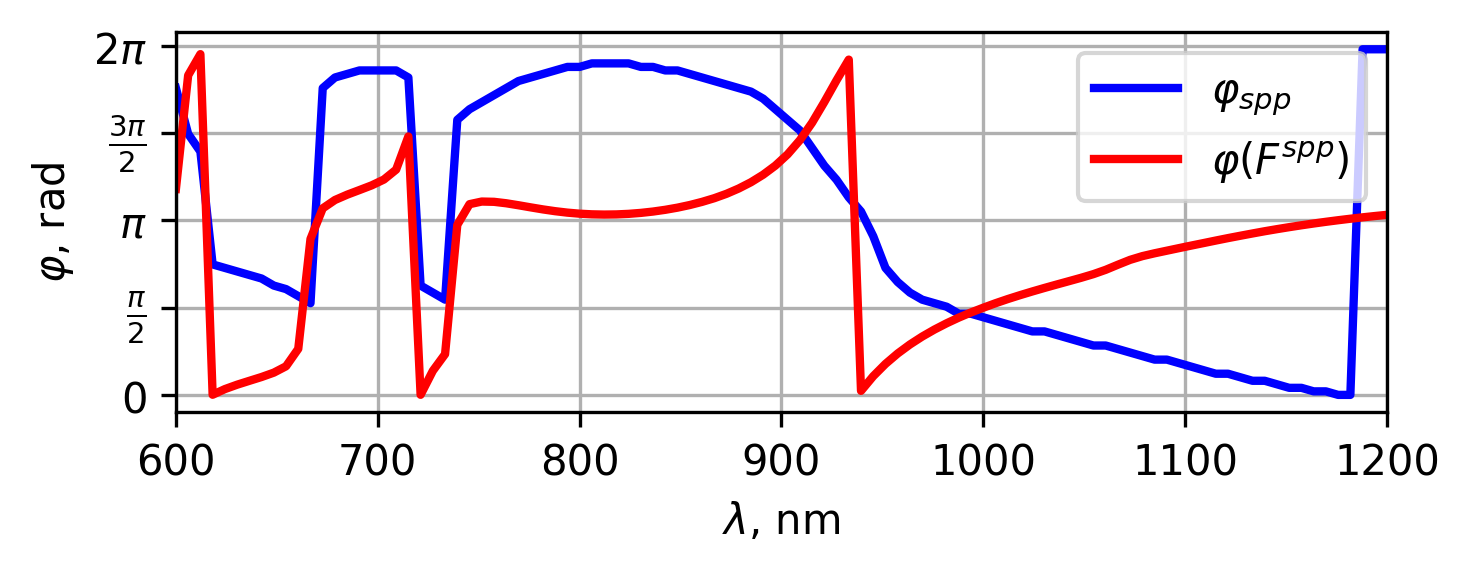

In [24]:
plt.figure(figsize=(5,2), dpi=300)
plt.plot(wls, phi_D_from_wl, label=r'$\varphi_{spp}$', c='blue', lw=2)

#plt.plot(Rs, angles_no_sc_from_R, label=r'$\varphi (F^{no\;sc})$', lw=2, c='r')
plt.plot(wls, angles_no_sc, label=r'$\varphi (F^{spp})$', lw=2, c='r')
y_ticks = [0, np.pi/2, np.pi, np.pi*3/2, 2*np.pi]
y_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']
plt.grid()
plt.legend()

plt.yticks(y_ticks,y_ticklabels)
plt.xlim(wls[0],wls[-1])
plt.ylabel('$\\varphi$, rad')
plt.xlabel('$\\lambda$, nm')
plt.tight_layout()
#plt.savefig(f'spp_vs_f_spp_from_R_z0_{dist}_angle_plot.png', dpi=300)
plt.show()

In [27]:
fmax_wls = 0
for i in range(len(wls)):
    f0 = force.F(wls[i], 1, [0,0,0], R, eps_Si, 0,amplitude=1,phase=0,a_angle=0, stop=STOP, full_output=False)[2]
    f0 = np.abs(f0)
    if f0 > fmax_wls:
        fmax_wls = f0

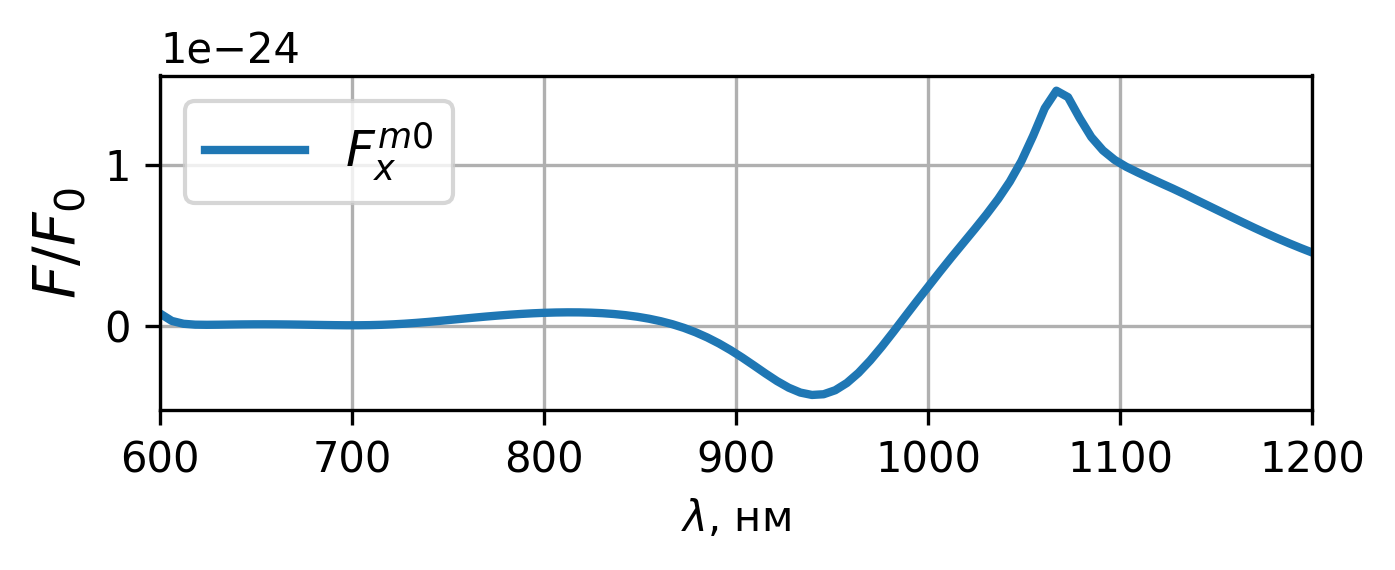

In [34]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 2), sharex=True, dpi=300)


ax1.plot(wls, F_x[:,4], label='$F_x^{m0}$', linewidth=2, color='#1f77b4')
#ax1.plot(wls, F_x[:,1], label='$F_x^{e0}$', linewidth=2, color='#ff7f0e')

ax1.set_ylabel('$F/F_0$', fontsize=14)
ax1.grid(True)
ax1.legend(fontsize=12, loc='best')
ax1.set_xlabel('$\\lambda$, нм')

plt.xlim(wls[0], wls[-1])

plt.tight_layout()
#plt.savefig(f'f_spp_from_wl_z0_{point[2]}.pdf', dpi=300)
plt.show()


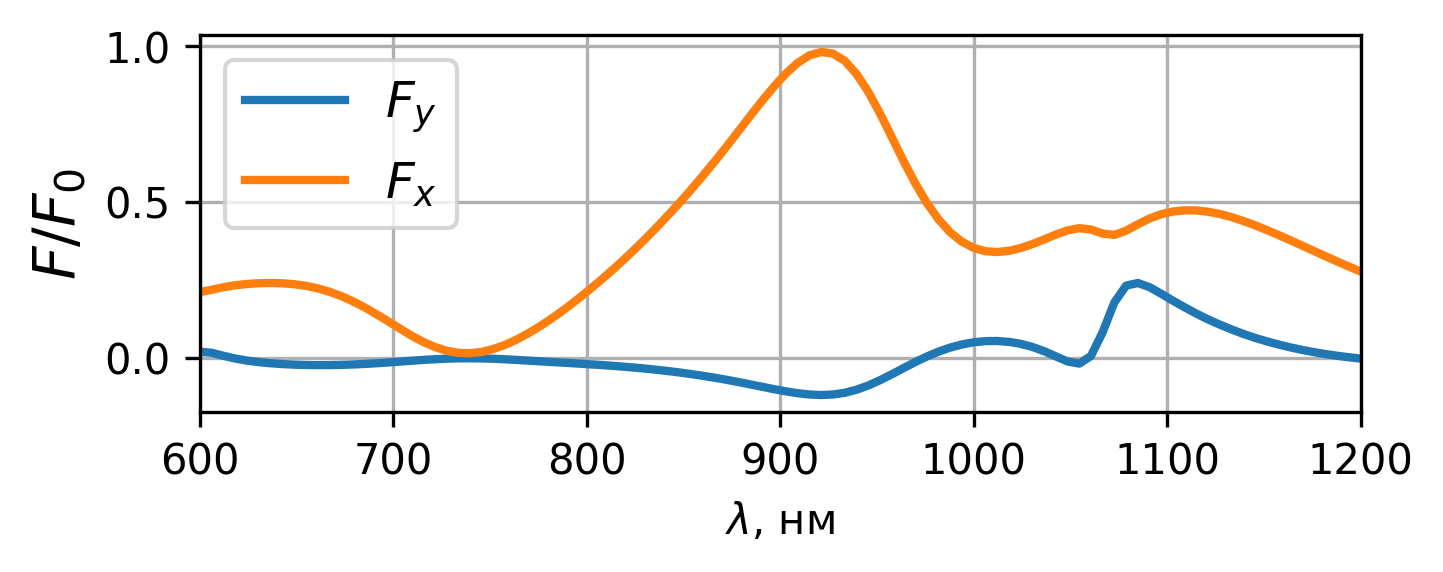

In [31]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 2), sharex=True, dpi=300)


ax1.plot(wls, F_y[:,0]/fmax_wls, label='$F_y$', linewidth=2, color='#1f77b4')
ax1.plot(wls, F_x[:,0]/fmax_wls, label='$F_x$', linewidth=2, color='#ff7f0e')

ax1.set_ylabel('$F/F_0$', fontsize=14)
ax1.grid(True)
ax1.legend(fontsize=12, loc='best')
ax1.set_xlabel('$\\lambda$, нм')

plt.xlim(wls[0], wls[-1])

plt.tight_layout()
#plt.savefig(f'f_spp_from_wl_z0_{point[2]}.pdf', dpi=300)
plt.show()


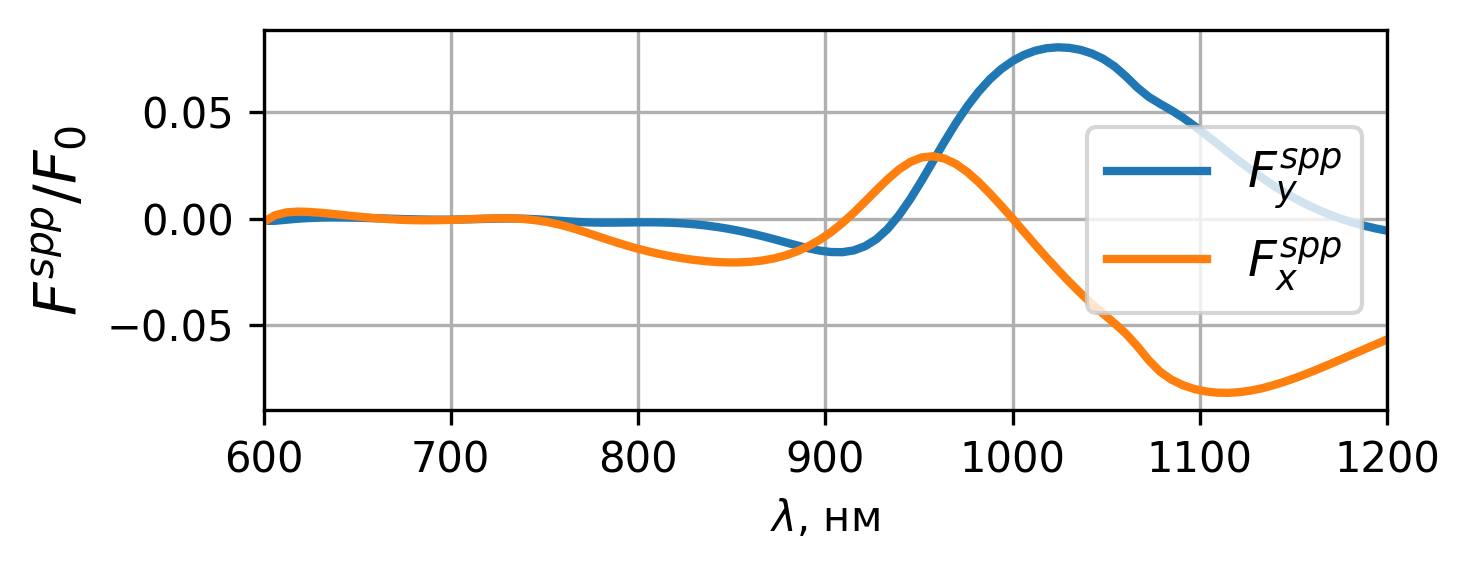

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 2), sharex=True, dpi=300)


ax1.plot(wls, Fsppy[:,0]/fmax_wls, label='$F_y^{spp}$', linewidth=2, color='#1f77b4')
ax1.plot(wls, Fsppx[:,0]/fmax_wls, label='$F_x^{spp}$', linewidth=2, color='#ff7f0e')

ax1.set_ylabel('$F^{spp}/F_0$', fontsize=14)
ax1.grid(True)
ax1.legend(fontsize=12, loc='best')
ax1.set_xlabel('$\\lambda$, нм')

plt.xlim(wls[0], wls[-1])

plt.tight_layout()
#plt.savefig(f'f_spp_from_wl_z0_{point[2]}.pdf', dpi=300)
plt.show()


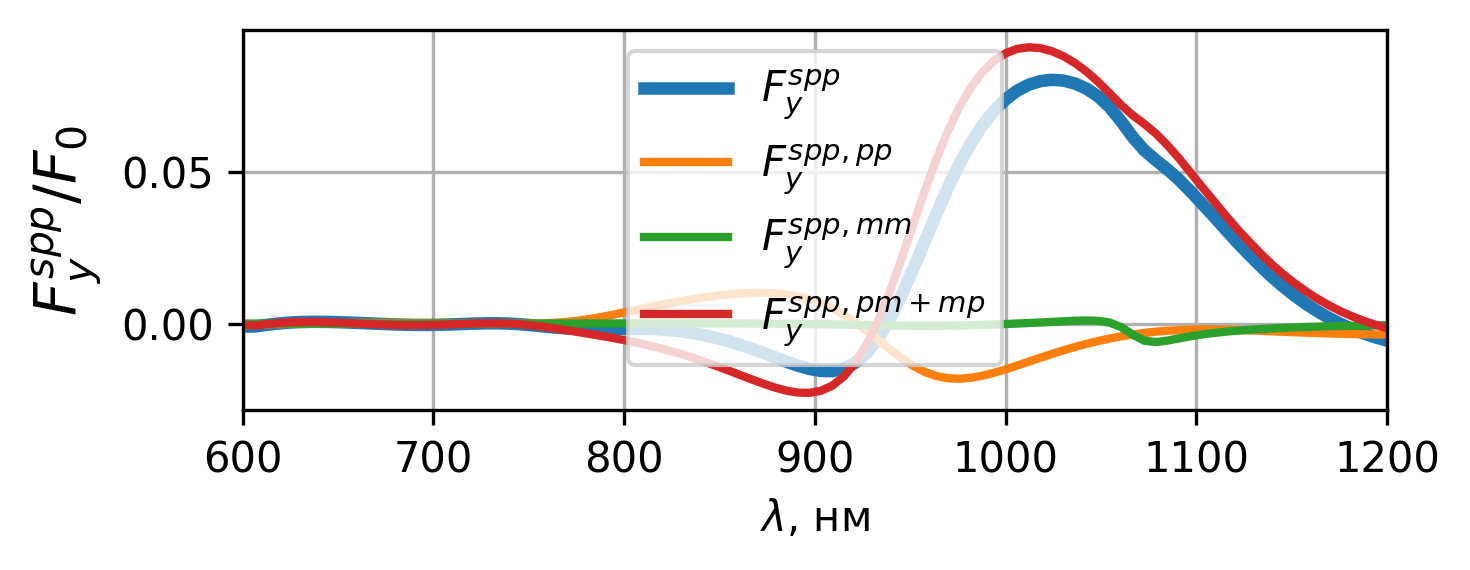

In [17]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 2), sharex=True, dpi=300)


ax1.plot(wls, Fsppy[:,0]/fmax_wls, label='$F_y^{spp}$', linewidth=3)
ax1.plot(wls, Fsppy[:,2]/fmax_wls, label='$F_y^{spp,pp}$', linewidth=2)
ax1.plot(wls, Fsppy[:,5]/fmax_wls, label='$F_y^{spp,mm}$', linewidth=2)
ax1.plot(wls, (Fsppy[:,6]+Fsppy[:,3])/fmax_wls, label='$F_y^{spp,pm+mp}$', linewidth=2)
#ax1.plot(wls, F_y[:,7]/fmax_wls, label='$F_y^{\\times}$', linewidth=2)

ax1.set_ylabel('$F_y^{spp}/F_0$', fontsize=14)
ax1.grid(True)
ax1.legend()
ax1.set_xlabel('$\\lambda$, нм')

plt.xlim(wls[0], wls[-1])

plt.tight_layout()
#plt.savefig(f'f__spp_y_from_wl_z0_{point[2]}.png', dpi=300)
plt.show()




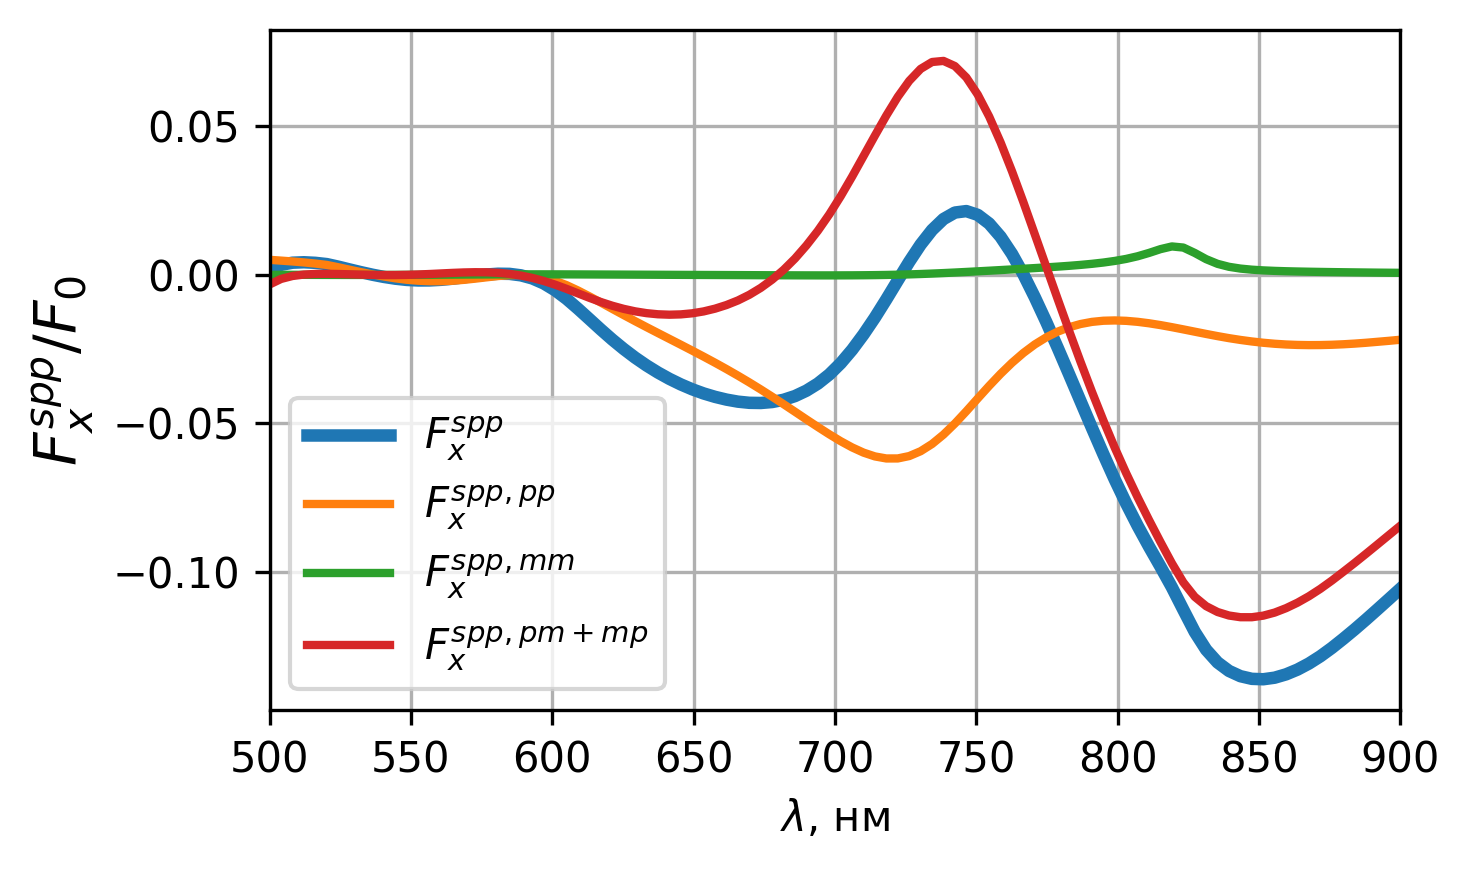

In [36]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 3), sharex=True, dpi=300)


ax1.plot(wls, Fsppx[:,0]/fmax_wls, label='$F_x^{spp}$', linewidth=3)
ax1.plot(wls, Fsppx[:,2]/fmax_wls, label='$F_x^{spp,pp}$', linewidth=2)
ax1.plot(wls, Fsppx[:,5]/fmax_wls, label='$F_x^{spp,mm}$', linewidth=2)
ax1.plot(wls, (Fsppx[:,6]+Fsppx[:,3])/fmax_wls, label='$F_x^{spp,pm+mp}$', linewidth=2)
#ax1.plot(wls, F_y[:,7]/fmax_wls, label='$F_y^{\\times}$', linewidth=2)

ax1.set_ylabel('$F_x^{spp}/F_0$', fontsize=14)
ax1.grid(True)
ax1.legend()
ax1.set_xlabel('$\\lambda$, нм')

plt.xlim(wls[0], wls[-1])

plt.tight_layout()
plt.savefig(f'f__spp_x_from_wl_z0_{point[2]}.png', dpi=300)
plt.show()

In [42]:

STOP = 45
ANGLE = 35 * np.pi / 180
wl = 700

phase_values = np.linspace(-np.pi, np.pi, 50)
a_angle = np.linspace(0, np.pi/2, 50)
angles = np.linspace(0, 2 * np.pi, 100)

def compute_for_params(angle_index, pha, a_i):
    p, m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R, eps_Si, ANGLE,
                                   amplitude=1, phase=pha, a_angle=a_i, stop=STOP)
    p, m = p[:, 0], m[:, 0]
    D = get_directivity(wl, p, m, eps_Au)
    D_angle = D(angles[angle_index])


    return angle_index, pha, a_i, D_angle, p, m


results = []


for angle_index in tqdm(range(len(angles))):
    for pha in phase_values:
        for a_i in a_angle:
            result = compute_for_params(angle_index, pha, a_i)
            results.append(result)

best_D = np.zeros(len(angles))
best_params = np.empty((len(angles), 2))
dipoles_p = np.empty((len(angles), 3), dtype=np.complex128)
dipoles_m = np.empty((len(angles), 3), dtype=np.complex128)

for i, pha, a_i, D, p, m in results:
    if D > best_D[i]:
        best_D[i] = D
        best_params[i] = (pha, a_i)
        dipoles_p[i] = p
        dipoles_m[i] = m



  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 100/100 [02:26<00:00,  1.46s/it]


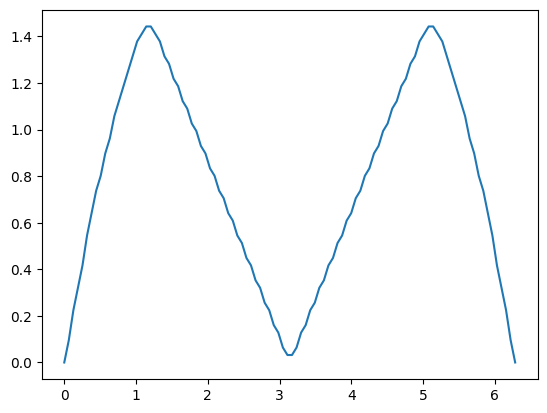

In [43]:
plt.plot(angles, np.unwrap(best_params[:,1]))

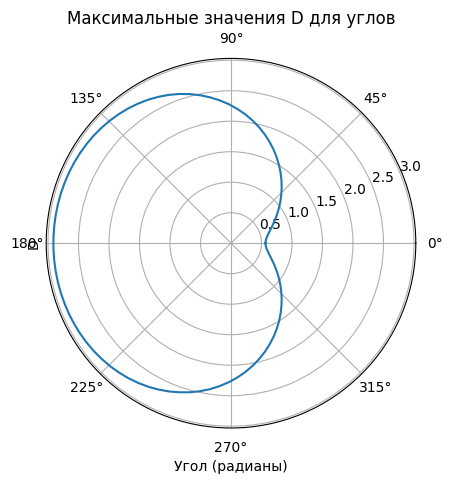

In [44]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angles, best_D)
ax.grid(True)
plt.xlabel("Угол (радианы)")
plt.ylabel("D")
ax.set_title("Максимальные значения D для углов")
plt.show()

In [47]:
PHI = np.linspace(0, 2*np.pi, 100)

F_x01_opt = np.empty((len(wls), 8))
F_y01_opt  = np.empty_like(F_x01)
F_z01_opt  = np.empty_like(F_x01)

F_x_opt  = np.empty((len(wls), 8))
F_y_opt  = np.empty_like(F_x)
F_z_opt  = np.empty_like(F_x)


directivity_opt = np.empty((len(PHI), len(best_params)))
for par_id, param in enumerate(best_params):
    for angle_idx in range(len(PHI)):
        D = get_directivity(wl, dipoles_p[par_id], dipoles_m[par_id], eps_Au)
        directivity_opt[angle_idx, par_id] = D(PHI[angle_idx])
        
        

for i in tqdm(range(len(best_params))):
    f =  force.F(wl, eps_Au, point, R, eps_Si, angle,amplitude=1,phase=best_params[i,0],a_angle=best_params[i,1], stop=STOP, full_output=True, stop_dipoles=45)
    F_x_opt[i,:] = f[0]
    F_y_opt[i,:] = f[1]
    F_z_opt[i,:] = f[2]
    
    f =  force.F(wl, eps_Au, point, R, eps_Si, angle,amplitude=1,phase=best_params[i,0],a_angle=best_params[i,1],stop=1, full_output=True, stop_dipoles=45)
    F_x01_opt[i,:] = f[0]
    F_y01_opt[i,:] = f[1]
    F_z01_opt[i,:] = f[2]
    

100%|██████████| 100/100 [00:01<00:00, 55.87it/s]


In [48]:
Fsppx_opt = F_x_opt - F_x01_opt
Fsppy_opt = F_y_opt - F_y01_opt
Fsppz_opt = F_z_opt - F_z01_opt

In [49]:
phiii = np.empty(len(best_params))
for i in range(len(best_params)):
    j = np.argmax(directivity_opt[:,i])
    phiii[i] = PHI[j]


(0.0, 100.0)

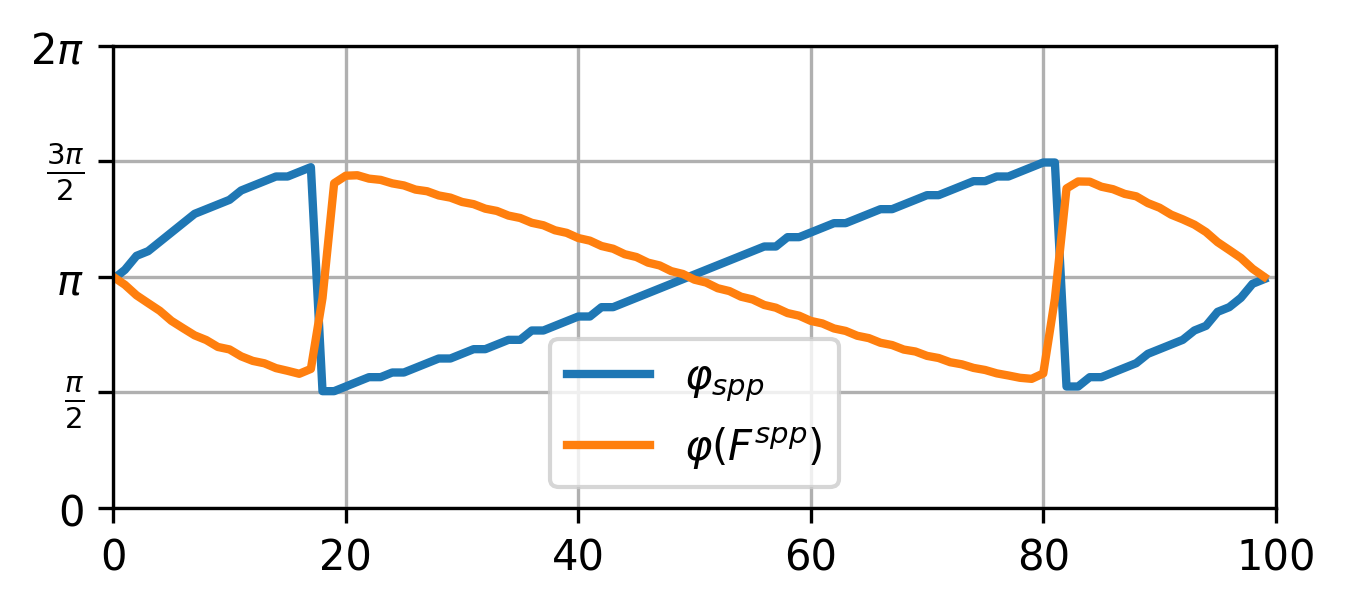

In [59]:
plt.figure(figsize=(5,2), dpi=300)
plt.plot(range(len(best_params)), phiii, label=r'$\varphi_{spp}$', lw=2)
plt.plot(range(len(best_params)), np.unwrap(np.arctan2(Fsppy_opt[:,2], Fsppx_opt[:,2])), label=r'$\varphi (F^{spp})$', lw=2)
plt.grid()
plt.legend()
y_ticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
y_ticklabels = [ r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']
plt.yticks(y_ticks,y_ticklabels)

plt.xlim(0,len(best_params))

(0.0, 100.0)

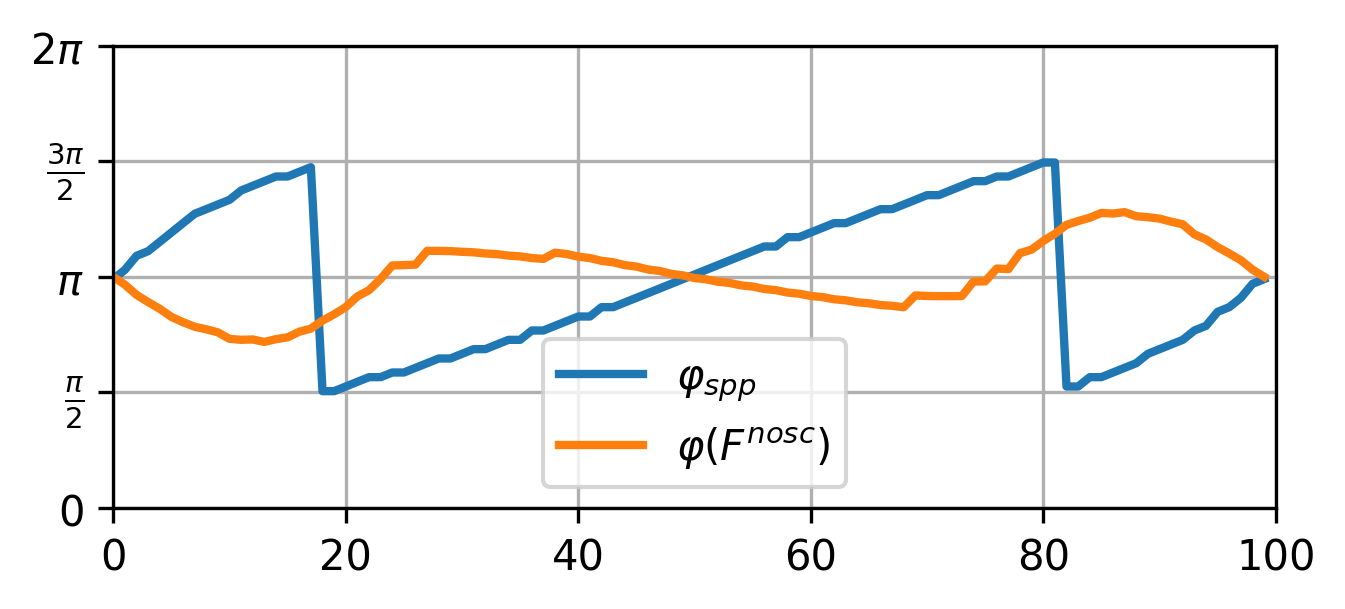

In [53]:
plt.figure(figsize=(5,2), dpi=300)
plt.plot(range(len(best_params)), phiii, label=r'$\varphi_{spp}$', lw=2)
plt.plot(range(len(best_params)), np.unwrap(np.arctan2(F_y_opt[:,0], F_x_opt[:,0]-F_x_opt[:,1]-F_x_opt[:,4])), label=r'$\varphi (F^{no sc})$', lw=2)
plt.grid()
plt.legend()
y_ticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
y_ticklabels = [ r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']
plt.yticks(y_ticks,y_ticklabels)

plt.xlim(0,len(best_params))